In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in the data
df = pd.read_csv('card_transdata.csv')


In [2]:
# descriptive statistics for each variable
descriptive_stats = df.describe()

descriptive_stats

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000
mean,26.673362,5.024225,1.825429,0.881668,0.350543,0.101366,0.651039,0.087334
std,64.681088,28.121731,2.821278,0.323001,0.477140,0.301813,0.476642,0.282324
min,0.004874,0.000407,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.880400,0.296334,0.475680,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.986522,0.997723,0.998890,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.811284,3.352326,2.100908,1.000000,1.000000,0.000000,1.000000,0.000000
max,5797.972589,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


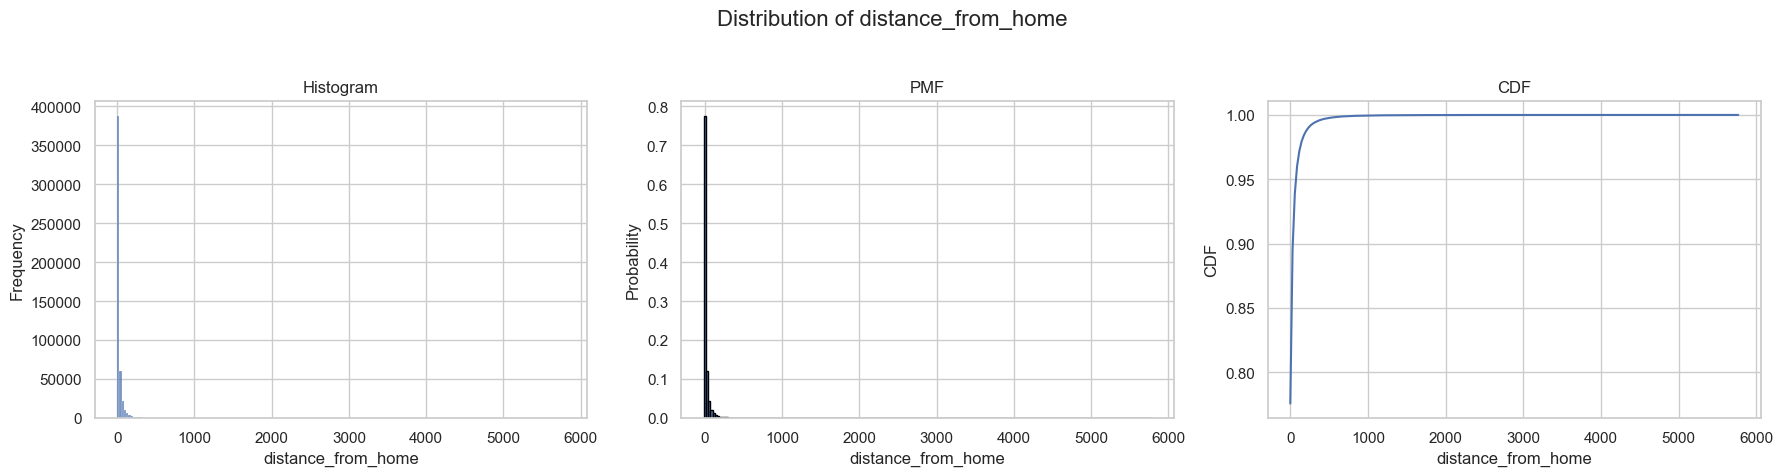

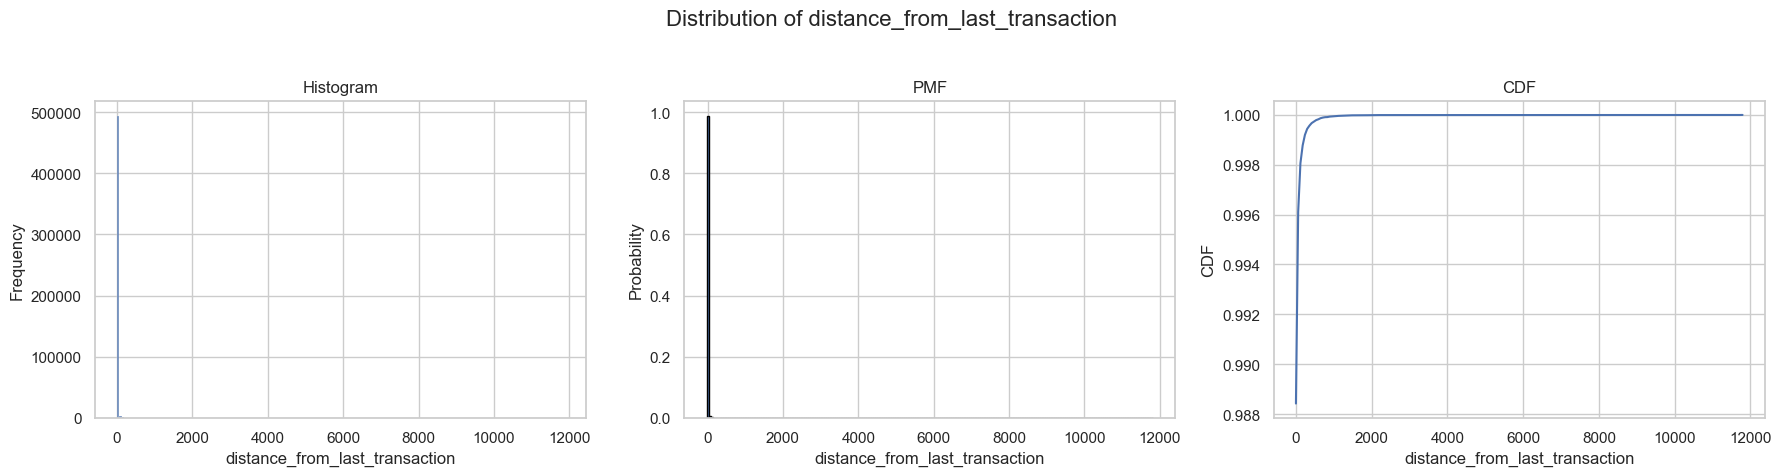

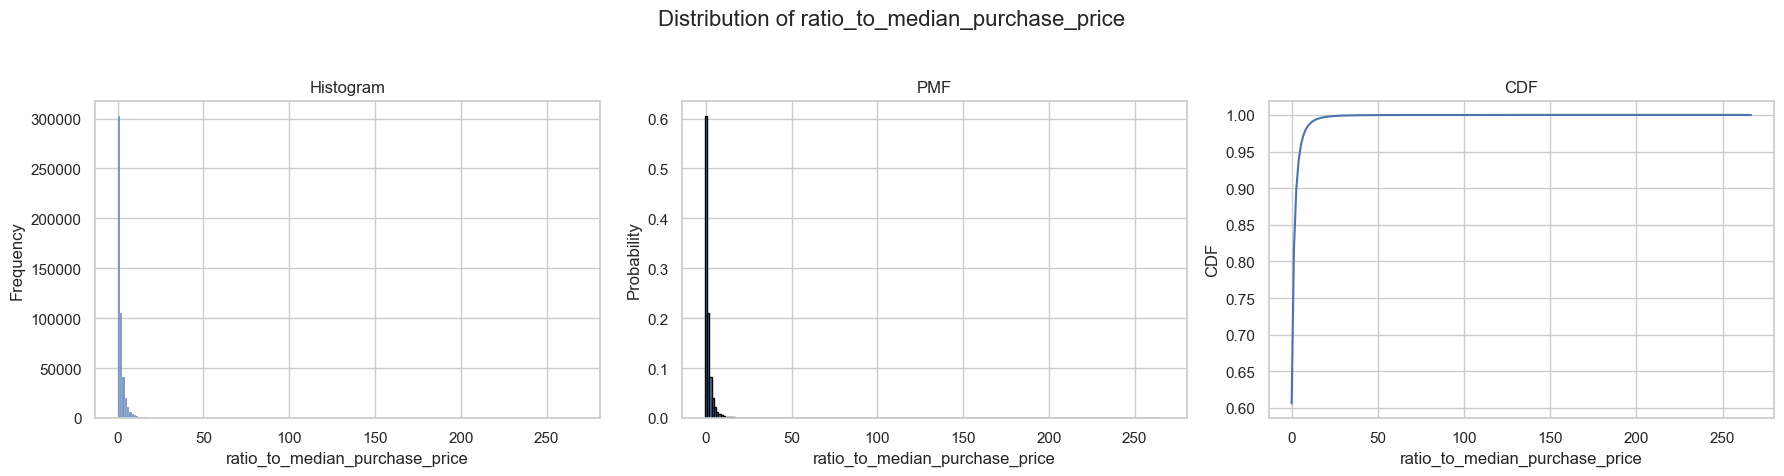

In [3]:
import seaborn as sns

sns.set(style="whitegrid")

# Plot distributions, PMFs, and CDFs for the variables
def plot_variable_distribution(data, variable_name, bins):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distribution of {variable_name}', fontsize=16)

    # Histogram
    sns.histplot(data[variable_name], bins=bins, kde=False, ax=ax[0])
    ax[0].set_title('Histogram')
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel('Frequency')

    # PMF
    counts, bin_edges = np.histogram(data[variable_name], bins=bins, density=True)
    pmf = counts / counts.sum()
    ax[1].bar(bin_edges[:-1], pmf, width=np.diff(bin_edges), edgecolor='black')
    ax[1].set_title('PMF')
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel('Probability')

    # CDF
    cdf = np.cumsum(pmf)
    ax[2].plot(bin_edges[:-1], cdf)
    ax[2].set_title('CDF')
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel('CDF')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plotting for 'distance_from_home'
plot_variable_distribution(df, 'distance_from_home', bins=200)

# Plotting for 'distance_from_last_transaction'
plot_variable_distribution(df, 'distance_from_last_transaction', bins=200)

# Plotting for 'ratio_to_median_purchase_price'
plot_variable_distribution(df, 'ratio_to_median_purchase_price', bins=200)

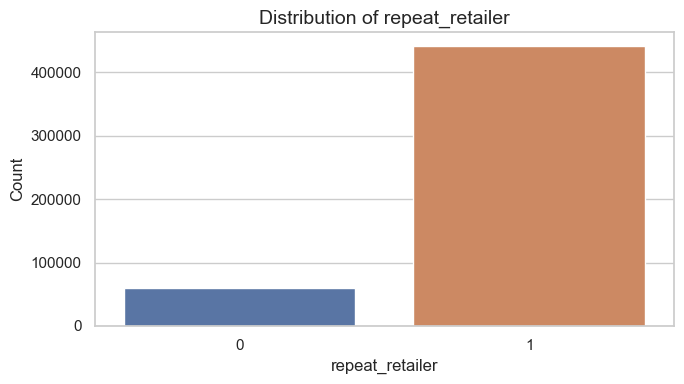

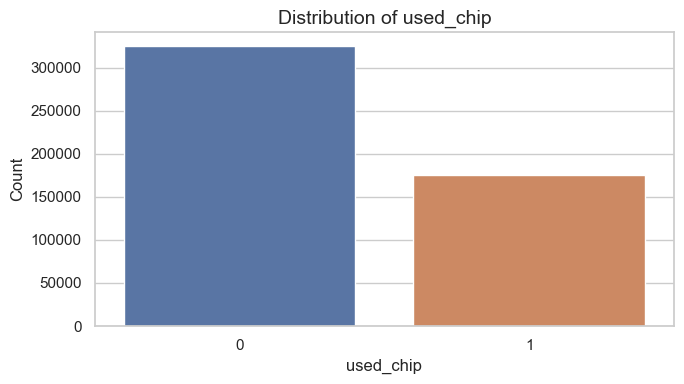

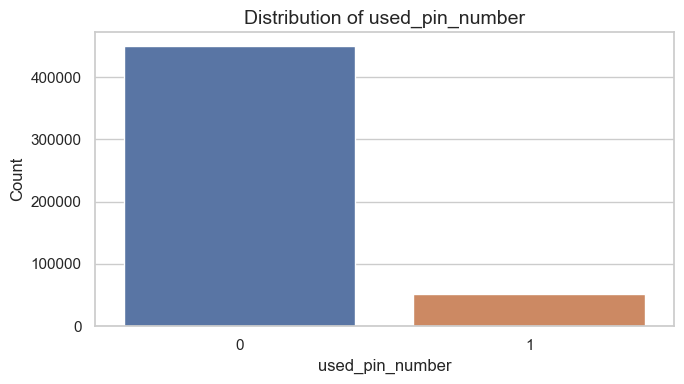

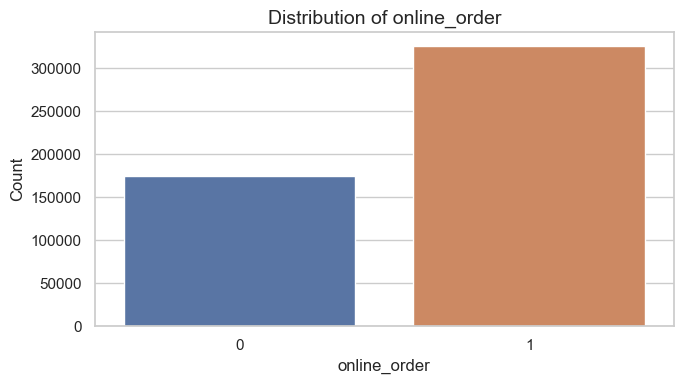

In [4]:
# Function to plot bar charts for binary variables
def plot_binary_distribution(data, variable_name):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.countplot(x=variable_name, data=data)
    ax.set_title(f'Distribution of {variable_name}', fontsize=14)
    ax.set_xlabel(variable_name)
    ax.set_ylabel('Count')
    plt.tight_layout()

# Plotting for 'repeat_retailer'
plot_binary_distribution(df, 'repeat_retailer')

# Plotting for 'used_chip'
plot_binary_distribution(df, 'used_chip')

# Plotting for 'used_pin_number'
plot_binary_distribution(df, 'used_pin_number')

# Plotting for 'online_order'
plot_binary_distribution(df, 'online_order')


In [5]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for each variable
outliers_distance_from_home, lb_dfh, ub_dfh = detect_outliers_iqr(df, 'distance_from_home')
outliers_distance_from_last_transaction, lb_dflt, ub_dflt = detect_outliers_iqr(df, 'distance_from_last_transaction')
outliers_ratio_to_median_purchase_price, lb_rtmpp, ub_rtmpp = detect_outliers_iqr(df, 'ratio_to_median_purchase_price')

# Summarize the findings
outliers_summary = pd.DataFrame({
    'Variable': ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'],
    'Outliers Count': [outliers_distance_from_home.shape[0], 
                       outliers_distance_from_last_transaction.shape[0], 
                       outliers_ratio_to_median_purchase_price.shape[0]],
    'Lower Bound': [lb_dfh, lb_dflt, lb_rtmpp],
    'Upper Bound': [ub_dfh, ub_dflt, ub_rtmpp]
})

outliers_summary


,Variable,Outliers Count,Lower Bound,Upper Bound
0,distance_from_home,51745,-29.015927,58.707611
1,distance_from_last_transaction,61957,-4.287653,7.936314
2,ratio_to_median_purchase_price,42018,-1.962161,4.538749


In [6]:
from scipy.stats import zscore

# Calculate Z-scores
df['z_distance_from_home'] = zscore(df['distance_from_home'])
df['z_distance_from_last_transaction'] = zscore(df['distance_from_last_transaction'])
df['z_ratio_to_median_purchase_price'] = zscore(df['ratio_to_median_purchase_price'])

# Identify outliers based on Z-score
outliers_z_distance_from_home = df[(df['z_distance_from_home'] < -3) | (df['z_distance_from_home'] > 3)]
outliers_z_distance_from_last_transaction = df[(df['z_distance_from_last_transaction'] < -3) | (df['z_distance_from_last_transaction'] > 3)]
outliers_z_ratio_to_median_purchase_price = df[(df['z_ratio_to_median_purchase_price'] < -3) | (df['z_ratio_to_median_purchase_price'] > 3)]

# Summarize
outliers_z_summary = pd.DataFrame({
    'Variable': ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'],
    'Outliers Count': [outliers_z_distance_from_home.shape[0], 
                       outliers_z_distance_from_last_transaction.shape[0], 
                       outliers_z_ratio_to_median_purchase_price.shape[0]]
})

outliers_z_summary


,Variable,Outliers Count
0,distance_from_home,6785
1,distance_from_last_transaction,3084
2,ratio_to_median_purchase_price,8390


In [7]:
from scipy.stats import mode, skew

# Calculate descriptive statistics
descriptive_stats = pd.DataFrame(index=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'])

# Mean
descriptive_stats['Mean'] = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']].mean()

# Mode
descriptive_stats['Mode'] = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']].mode().iloc[0]

# Spread
descriptive_stats['Standard Deviation'] = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']].std()

# Skewness
descriptive_stats['Skewness'] = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']].skew()

descriptive_stats



,Mean,Mode,Standard Deviation,Skewness
distance_from_home,26.673362,10.257915,64.681088,15.841266
distance_from_last_transaction,5.024225,0.019036,28.121731,167.723314
ratio_to_median_purchase_price,1.825429,0.108387,2.821278,10.391055
repeat_retailer,0.881668,1.000000,0.323001,-2.363267
used_chip,0.350543,0.000000,0.477140,0.626473
used_pin_number,0.101366,0.000000,0.301813,2.641602
online_order,0.651039,1.000000,0.476642,-0.633767


In [8]:
# get count of transactions for used_pin_number_count
used_pin_number_count = df['used_pin_number'].value_counts()
print(f'used_pin_number count True {used_pin_number_count[0]}')
print(f'used_pin_number count False {used_pin_number_count[1]}')
print()

# get count of transactions for used_chip
used_chip_count = df['used_chip'].value_counts()
print(f'used_chip_count count True {used_chip_count[0]}')
print(f'used_chip_count count False {used_chip_count[1]}')
print()

# get count of transactions for online_order
online_order_count = df['online_order'].value_counts()
print(f'online_order_count count True {online_order_count[0]}')
print(f'online_order_count count False {online_order_count[1]}')
print()


used_pin_number count True 449316
used_pin_number count False 50683

used_chip_count count True 324728
used_chip_count count False 175271

online_order_count count True 174480
online_order_count count False 325519



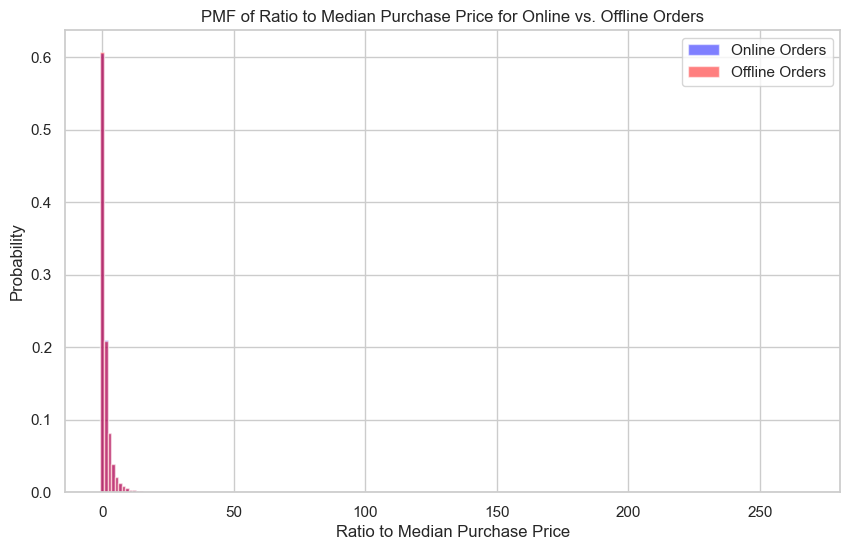

In [9]:
# Split the dataset based on 'online_order'
online_orders = df[df['online_order'] == 1]['ratio_to_median_purchase_price']
offline_orders = df[df['online_order'] == 0]['ratio_to_median_purchase_price']

# Calculate PMFs
bins = np.linspace(0, df['ratio_to_median_purchase_price'].max(), 200)
online_order_pmf, _ = np.histogram(online_orders, bins=bins, density=True)
offline_order_pmf, _ = np.histogram(offline_orders, bins=bins, density=True)

# Normalize the PMFs
online_order_pmf = online_order_pmf / sum(online_order_pmf)
offline_order_pmf = offline_order_pmf / sum(offline_order_pmf)

# Plot the PMFs
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], online_order_pmf, width=np.diff(bins), color='blue', alpha=0.5, label='Online Orders')
plt.bar(bins[:-1], offline_order_pmf, width=np.diff(bins), color='red', alpha=0.5, label='Offline Orders')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Probability')
plt.title('PMF of Ratio to Median Purchase Price for Online vs. Offline Orders')
plt.legend()
plt.show()


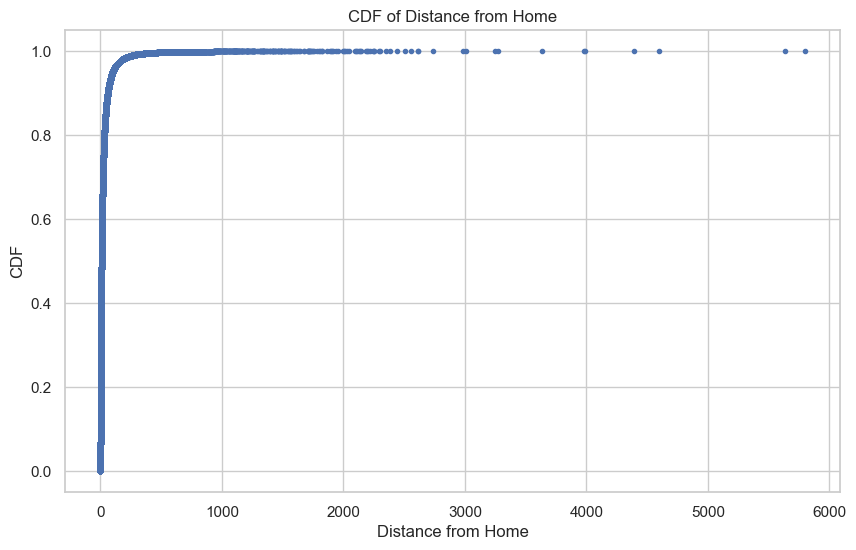

In [10]:
# Calculate the CDF
data_sorted = np.sort(df['distance_from_home'])
cdf_values = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(data_sorted, cdf_values, marker='.', linestyle='none')
plt.xlabel('Distance from Home')
plt.ylabel('CDF')
plt.title('CDF of Distance from Home')
plt.grid(True)
plt.show()


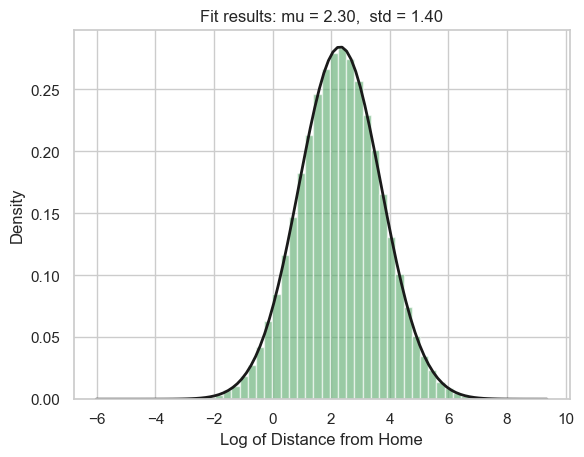

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Apply a log transformation
log_distances = np.log(df['distance_from_home'] + 1e-6)

# Fit a normal distribution to the log-transformed data
mu, std = norm.fit(log_distances)

# Plot the histogram of the log-transformed data
plt.hist(log_distances, bins=50, density=True, alpha=0.6, color='g')

# Plot the distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Log of Distance from Home')
plt.ylabel('Density')

plt.show()



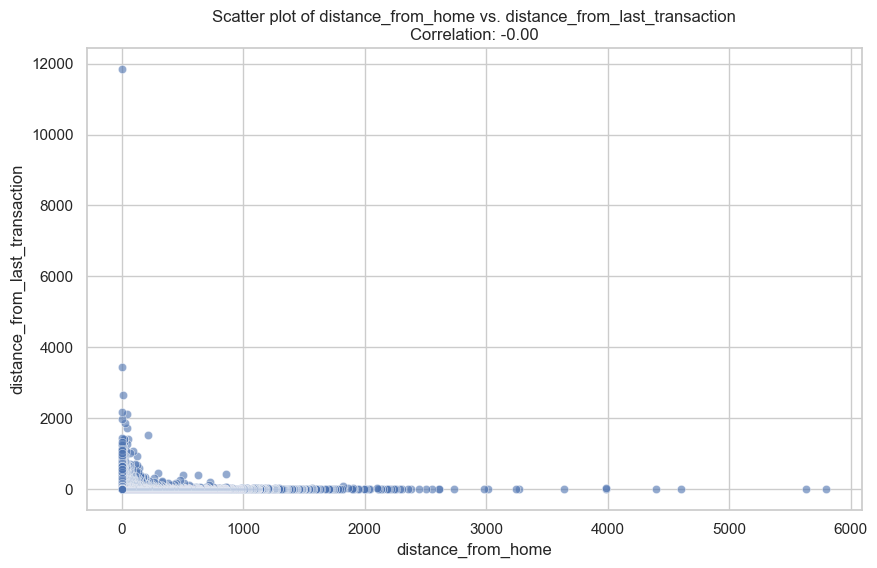

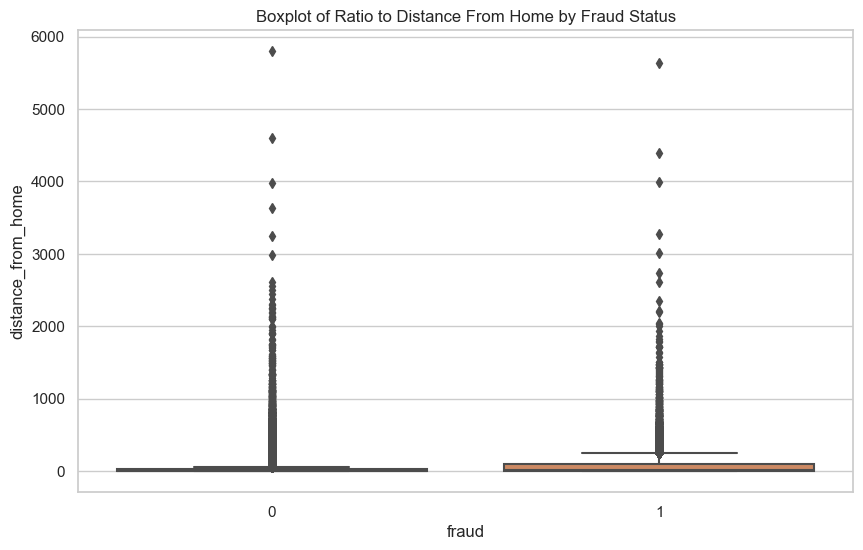

(-0.0009276932770463215, 0.18544141027735342)

In [12]:
from scipy.stats import pearsonr

sns.set(style="whitegrid")

# create scatter plots and calculate Pearson's correlation
def plot_scatter_and_calculate_correlation(df, x, y):
    # Calculate Pearson's correlation
    corr, _ = pearsonr(df[x], df[y])

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=df, alpha=0.6)
    plt.title(f'Scatter plot of {x} vs. {y}\nCorrelation: {corr:.2f}')
    plt.show()
    
    return corr

# Scatter plot and correlation
corr_distance = plot_scatter_and_calculate_correlation(df, 'distance_from_home', 'distance_from_last_transaction')

# Boxplot of 'distance_from_home' by 'fraud'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='distance_from_home', data=df)
plt.title('Boxplot of Ratio to Distance From Home by Fraud Status')
plt.show()

corr_fraud = df['fraud'].corr(df['distance_from_home'])

corr_distance, corr_fraud



In [13]:
#Calculate the test statistic
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

fraudulent = df[df['fraud'] == 1]['distance_from_home']
non_fraudulent = df[df['fraud'] == 0]['distance_from_home']

observed_diff = diff_of_means(fraudulent, non_fraudulent)

def permutation_test(data_1, data_2, iters=100):
    concat_data = np.concatenate((data_1, data_2))
    perm_diffs = []

    for _ in range(iters):
        np.random.shuffle(concat_data)
        perm_fraudulent = concat_data[:len(data_1)]
        perm_non_fraudulent = concat_data[len(data_1):]
        perm_diff = diff_of_means(perm_fraudulent, perm_non_fraudulent)
        perm_diffs.append(perm_diff)

    return perm_diffs

# Run the permutation test
perm_diffs = permutation_test(fraudulent, non_fraudulent)

# Calculate the p-value
p_value = np.mean(np.array(perm_diffs) >= observed_diff)

print(f"Observed difference in means: {observed_diff}")
print(f"P-value: {p_value}")


Observed difference in means: 42.484997610698514
P-value: 0.0


In [14]:
import statsmodels.api as sm

# The dependent var
y = df['fraud']

# The independent vars
X = df[['distance_from_home', 'distance_from_last_transaction', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
# X = df[['distance_from_home', 'distance_from_last_transaction']]
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.243909
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               499999
Model:                          Logit   Df Residuals:                   499992
Method:                           MLE   Df Model:                            6
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                  0.1769
Time:                        16:56:25   Log-Likelihood:            -1.2195e+05
converged:                       True   LL-Null:                   -1.4816e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4085      0.028   -158.593    